In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
r_mailData = pd.read_csv("/content/spam.csv", encoding='latin-1') # Try latin-1 encoding.

In [5]:
r_mailData.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
r_mailData.drop("Unnamed: 2",inplace=True,axis=1)
r_mailData.drop("Unnamed: 3",inplace=True,axis=1)
r_mailData.drop("Unnamed: 4",inplace=True,axis=1)

In [7]:
r_mailData.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
r_mailData.rename(columns={'v1':'target','v2':'text'},inplace=True)
r_mailData.sample(5)

,target,text
1209,ham,His bday real is in april .
3585,spam,I am hot n horny and willing I live local to y...
2392,ham,"Thanks da thangam, i feel very very happy dear..."
2812,ham,Enjoy the showers of possessiveness poured on ...
4678,ham,Sry da..jst nw only i came to home..


In [9]:
r_mailData.isna().sum()

,0
target,0
text,0


In [10]:
r_mailData=r_mailData.where((pd.notnull(r_mailData)),'')

In [11]:
r_mailData.shape

(5572, 2)

In [15]:
r_mailData.loc[r_mailData['target']=='spam','target',]=0
r_mailData.loc[r_mailData['target']=='ham','target',]=1

In [16]:
r_mailData.head()

,target,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
r_mailData.duplicated().sum()

403

In [18]:
r_mailData = r_mailData.drop_duplicates(keep='first')

In [19]:
r_mailData['target'].value_counts()

,count
target,
1,4516
0,653


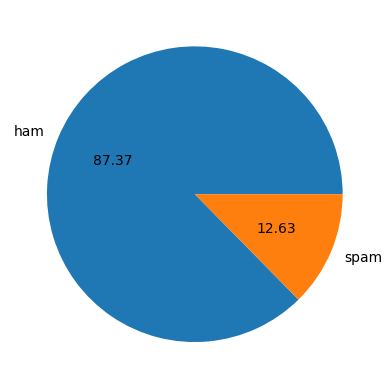

In [20]:
import matplotlib.pyplot as plt
plt.pie(r_mailData['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
ham_messages = r_mailData[r_mailData['target'] == 1]
spam_messages = r_mailData[r_mailData['target'] == 0]

number_of_spam_messages = len(spam_messages)

sampled_ham_messages = ham_messages.sample(n=number_of_spam_messages, random_state=42) # random_state for reproducibility


balanced_data = pd.concat([sampled_ham_messages, spam_messages], axis=0)

balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_data['target'].value_counts())


target
0    653
1    653
Name: count, dtype: int64


In [22]:
X = balanced_data['text']
y = balanced_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(X.shape)
print(X_train.shape)
X_test.shape


(1306,)
(1044,)


(262,)

In [23]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [24]:
print(X_train_features)

  (0, 79)	0.3496561839895543
  (0, 3163)	0.3301244706474729
  (0, 220)	0.3301244706474729
  (0, 1084)	0.17442954004872677
  (0, 477)	0.24381338830993554
  (0, 2602)	0.18346637768701635
  (0, 1429)	0.2828768149940983
  (0, 3372)	0.16736748470633447
  (0, 2233)	0.17379984307887128
  (0, 2484)	0.3301244706474729
  (0, 1294)	0.2828768149940983
  (0, 2620)	0.3301244706474729
  (0, 1005)	0.3162664994918263
  (1, 2233)	0.16912585277922876
  (1, 2768)	0.3402528980991548
  (1, 1159)	0.2525109198626328
  (1, 3560)	0.17359358116704
  (1, 1101)	0.3402528980991548
  (1, 1124)	0.19982594529812703
  (1, 130)	0.3402528980991548
  (1, 2549)	0.24277768584343987
  (1, 3295)	0.29730115755384195
  (1, 2512)	0.321246450126012
  (1, 2766)	0.2697482647342975
  (1, 1606)	0.2525109198626328
  :	:
  (1041, 1227)	0.3779644730092272
  (1041, 1208)	0.3779644730092272
  (1041, 1209)	0.3779644730092272
  (1041, 1207)	0.3779644730092272
  (1041, 1206)	0.3779644730092272
  (1041, 1205)	0.3779644730092272
  (1042, 1084)

In [25]:
model=LogisticRegression()

In [26]:
model.fit(X_train_features,y_train)

LogisticRegression()

In [27]:
prediction_on_train=model.predict(X_train_features)
accuracy_score_data=accuracy_score(y_train,prediction_on_train)

In [28]:
print(accuracy_score_data)

0.985632183908046


In [29]:
prediction_on_test=model.predict(X_test_features)
accuracy_score_data_test=accuracy_score(y_test,prediction_on_test)

In [30]:
print(accuracy_score_data_test)

0.9351145038167938


In [31]:
input_mail=["WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]
input_data_feat=feature_extraction.transform(input_mail)

prdiction=model.predict(input_data_feat)
print(prdiction)

[0]


In [32]:
import pickle
pickle.dump(model, open('spam_model.pkl', 'wb'))
pickle.dump(feature_extraction, open('vectorizer.pkl', 'wb'))
